In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
testset = pd.read_csv('testset.csv')

DATA CLEANING

In [69]:
testset.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [70]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
datetime_utc    100990 non-null object
 _conds         100918 non-null object
 _dewptm        100369 non-null float64
 _fog           100990 non-null int64
 _hail          100990 non-null int64
 _heatindexm    29155 non-null float64
 _hum           100233 non-null float64
 _precipm       0 non-null float64
 _pressurem     100758 non-null float64
 _rain          100990 non-null int64
 _snow          100990 non-null int64
 _tempm         100317 non-null float64
 _thunder       100990 non-null int64
 _tornado       100990 non-null int64
 _vism          96562 non-null float64
 _wdird         86235 non-null float64
 _wdire         86235 non-null object
 _wgustm        1072 non-null float64
 _windchillm    579 non-null float64
 _wspdm         98632 non-null float64
dtypes: float64(11), int64(6), object(3)
memory usage: 15.4+ MB


In [71]:
testset.shape

(100990, 20)

In [72]:
testset.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [73]:
testset.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [74]:
testset.columns = ['datetime_utc', 'conds','dewptm','fog','hail','heatindexm','hum','precipm','pressurem','rain','snow','tempm','thunder','tornado','vism','wdird','wdire','wgustm','windchillm','wspdm']

In [75]:
testset.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

drop precipm column since it contains no data

In [76]:
testset.drop('precipm', axis = 1, inplace=True)
testset

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


Taking care of missing data

In [77]:
testset.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado', 'vism',
       'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [78]:
testset.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wgustm,windchillm,wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [79]:
from sklearn.preprocessing import Imputer
#cols_to_impute = testset.iloc[:,[2,5,6,7,10,13,14,16,17,18]].values

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(testset.iloc[:,[2,5,6,7,10,13,14,16,17,18]])
testset.iloc[:,[2,5,6,7,10,13,14,16,17,18]] = imputer.transform(testset.iloc[:,[2,5,6,7,10,13,14,16,17,18]])

In [80]:
testset.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wgustm,windchillm,wspdm
count,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,1.009900e+05,100990.000000,100990.000000,100990.000000,100990.000000,100990.00000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.036852,0.254625,0.011345,2.694736,23.718373,3.180127e+05,0.159908,0.003147,8.454547,0.096633,0.00445,20.286111,110.889644,0.705283,0.091033,11.792032
min,-24.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,35.651710,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.600000,70.000000,37.671175,5.713817,0.000000
50%,15.000000,0.000000,0.000000,35.651710,58.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,163.549974,37.671175,5.713817,7.400000
75%,22.000000,0.000000,0.000000,35.651710,77.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,37.671175,5.713817,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [81]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 19 columns):
datetime_utc    100990 non-null object
conds           100918 non-null object
dewptm          100990 non-null float64
fog             100990 non-null int64
hail            100990 non-null int64
heatindexm      100990 non-null float64
hum             100990 non-null float64
pressurem       100990 non-null float64
rain            100990 non-null int64
snow            100990 non-null int64
tempm           100990 non-null float64
thunder         100990 non-null int64
tornado         100990 non-null int64
vism            100990 non-null float64
wdird           100990 non-null float64
wdire           86235 non-null object
wgustm          100990 non-null float64
windchillm      100990 non-null float64
wspdm           100990 non-null float64
dtypes: float64(10), int64(6), object(3)
memory usage: 14.6+ MB


In [82]:
testset.drop(['conds', 'wdire'], axis=1, inplace=True)

In [83]:
testset.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wgustm,windchillm,wspdm
count,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,1.009900e+05,100990.000000,100990.000000,100990.000000,100990.000000,100990.00000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.036852,0.254625,0.011345,2.694736,23.718373,3.180127e+05,0.159908,0.003147,8.454547,0.096633,0.00445,20.286111,110.889644,0.705283,0.091033,11.792032
min,-24.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,35.651710,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.600000,70.000000,37.671175,5.713817,0.000000
50%,15.000000,0.000000,0.000000,35.651710,58.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,163.549974,37.671175,5.713817,7.400000
75%,22.000000,0.000000,0.000000,35.651710,77.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,37.671175,5.713817,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


Extracting date, year, month, day and hour from datetime_utc column

In [84]:
testset['Date'] = pd.to_datetime(testset['datetime_utc'])
testset['year'] = testset['Date'].dt.year
testset['month'] = testset['Date'].dt.month
testset['day'] = testset['Date'].dt.day
testset['hour'] = testset['Date'].dt.hour

In [85]:
testset.drop(['datetime_utc'], axis=1, inplace=True)

In [86]:
testset['id'] = np.arange(1,100991,1)
testset

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,wdird,wgustm,windchillm,wspdm,Date,year,month,day,hour,id
0,9.0,0,0,35.65171,27.0,1010.0,0,0,30.0,0,...,280.000000,37.671175,5.713817,7.400000,1996-11-01 11:00:00,1996,11,1,11,1
1,10.0,0,0,35.65171,32.0,-9999.0,0,0,28.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 12:00:00,1996,11,1,12,2
2,11.0,0,0,35.65171,44.0,-9999.0,0,0,24.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 13:00:00,1996,11,1,13,3
3,10.0,0,0,35.65171,41.0,1010.0,0,0,24.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 14:00:00,1996,11,1,14,4
4,11.0,0,0,35.65171,47.0,1011.0,0,0,23.0,0,...,0.000000,37.671175,5.713817,0.000000,1996-11-01 16:00:00,1996,11,1,16,5
5,12.0,0,0,35.65171,56.0,1011.0,0,0,21.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 17:00:00,1996,11,1,17,6
6,13.0,0,0,35.65171,60.0,1010.0,0,0,21.0,0,...,0.000000,37.671175,5.713817,0.000000,1996-11-01 18:00:00,1996,11,1,18,7
7,13.0,0,0,35.65171,60.0,-9999.0,0,0,21.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 19:00:00,1996,11,1,19,8
8,13.0,0,0,35.65171,68.0,-9999.0,0,0,19.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 20:00:00,1996,11,1,20,9
9,13.0,0,0,35.65171,68.0,1010.0,0,0,19.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 21:00:00,1996,11,1,21,10


In [161]:
testset2 = testset.copy()

detecting and removing outliers on basis of dewptm column

In [162]:
dewptm = testset2['dewptm']
id = testset2['id']

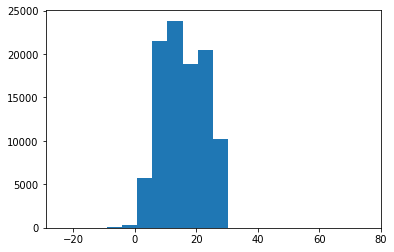

In [163]:
plt.hist(dewptm, bins=20, range=(-24,75))
plt.show()

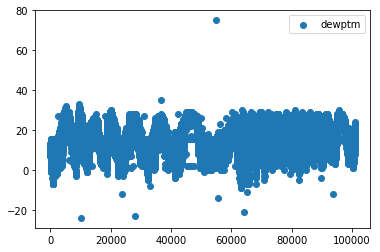

In [164]:
plt.scatter(id, dewptm)
plt.legend()
plt.show()

In [165]:
dewptm[dewptm < -8].aggregate('count')

9

In [166]:
dewptm[dewptm > 31].aggregate('count')

6

In [167]:
# modify the values of dewptm greater than 31 or less than -8

In [168]:
dewptm = dewptm[dewptm <31]
dewptm = dewptm[dewptm > -8]
dewptm.aggregate('count')

100955

In [172]:
testset2.head()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,wdird,wgustm,windchillm,wspdm,Date,year,month,day,hour,id
0,9.0,0,0,35.65171,27.0,1010.0,0,0,30.0,0,...,280.0,37.671175,5.713817,7.400000,1996-11-01 11:00:00,1996,11,1,11,1
1,10.0,0,0,35.65171,32.0,-9999.0,0,0,28.0,0,...,0.0,37.671175,5.713817,7.678463,1996-11-01 12:00:00,1996,11,1,12,2
2,11.0,0,0,35.65171,44.0,-9999.0,0,0,24.0,0,...,0.0,37.671175,5.713817,7.678463,1996-11-01 13:00:00,1996,11,1,13,3
3,10.0,0,0,35.65171,41.0,1010.0,0,0,24.0,0,...,0.0,37.671175,5.713817,7.678463,1996-11-01 14:00:00,1996,11,1,14,4
4,11.0,0,0,35.65171,47.0,1011.0,0,0,23.0,0,...,0.0,37.671175,5.713817,0.000000,1996-11-01 16:00:00,1996,11,1,16,5


In [183]:
t3 = testset2[testset2['dewptm'] < 31.0] #and testset2['dewptm'] > -8.0
t3

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,wdird,wgustm,windchillm,wspdm,Date,year,month,day,hour,id
0,9.0,0,0,35.65171,27.0,1010.0,0,0,30.0,0,...,280.000000,37.671175,5.713817,7.400000,1996-11-01 11:00:00,1996,11,1,11,1
1,10.0,0,0,35.65171,32.0,-9999.0,0,0,28.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 12:00:00,1996,11,1,12,2
2,11.0,0,0,35.65171,44.0,-9999.0,0,0,24.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 13:00:00,1996,11,1,13,3
3,10.0,0,0,35.65171,41.0,1010.0,0,0,24.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 14:00:00,1996,11,1,14,4
4,11.0,0,0,35.65171,47.0,1011.0,0,0,23.0,0,...,0.000000,37.671175,5.713817,0.000000,1996-11-01 16:00:00,1996,11,1,16,5
5,12.0,0,0,35.65171,56.0,1011.0,0,0,21.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 17:00:00,1996,11,1,17,6
6,13.0,0,0,35.65171,60.0,1010.0,0,0,21.0,0,...,0.000000,37.671175,5.713817,0.000000,1996-11-01 18:00:00,1996,11,1,18,7
7,13.0,0,0,35.65171,60.0,-9999.0,0,0,21.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 19:00:00,1996,11,1,19,8
8,13.0,0,0,35.65171,68.0,-9999.0,0,0,19.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 20:00:00,1996,11,1,20,9
9,13.0,0,0,35.65171,68.0,1010.0,0,0,19.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 21:00:00,1996,11,1,21,10


In [184]:
t3 = t3[t3['dewptm'] > -8.0]
t3

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,wdird,wgustm,windchillm,wspdm,Date,year,month,day,hour,id
0,9.0,0,0,35.65171,27.0,1010.0,0,0,30.0,0,...,280.000000,37.671175,5.713817,7.400000,1996-11-01 11:00:00,1996,11,1,11,1
1,10.0,0,0,35.65171,32.0,-9999.0,0,0,28.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 12:00:00,1996,11,1,12,2
2,11.0,0,0,35.65171,44.0,-9999.0,0,0,24.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 13:00:00,1996,11,1,13,3
3,10.0,0,0,35.65171,41.0,1010.0,0,0,24.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 14:00:00,1996,11,1,14,4
4,11.0,0,0,35.65171,47.0,1011.0,0,0,23.0,0,...,0.000000,37.671175,5.713817,0.000000,1996-11-01 16:00:00,1996,11,1,16,5
5,12.0,0,0,35.65171,56.0,1011.0,0,0,21.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 17:00:00,1996,11,1,17,6
6,13.0,0,0,35.65171,60.0,1010.0,0,0,21.0,0,...,0.000000,37.671175,5.713817,0.000000,1996-11-01 18:00:00,1996,11,1,18,7
7,13.0,0,0,35.65171,60.0,-9999.0,0,0,21.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 19:00:00,1996,11,1,19,8
8,13.0,0,0,35.65171,68.0,-9999.0,0,0,19.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 20:00:00,1996,11,1,20,9
9,13.0,0,0,35.65171,68.0,1010.0,0,0,19.0,0,...,0.000000,37.671175,5.713817,7.678463,1996-11-01 21:00:00,1996,11,1,21,10


In [185]:
t3.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,vism,wdird,wgustm,windchillm,wspdm,year,month,day,hour,id
count,100955.000000,100955.000000,100955.000000,100955.000000,100955.000000,1.009550e+05,100955.000000,100955.000000,100955.000000,100955.000000,...,100955.000000,100955.000000,100955.000000,100955.000000,100955.000000,100955.000000,100955.000000,100955.000000,100955.000000,100955.000000
mean,15.740263,0.069704,0.000129,35.647886,57.906320,1.932762e+03,0.026239,0.000010,25.449787,0.009430,...,2.402697,163.563091,37.671175,5.713817,7.678534,2004.936328,6.579545,15.690040,10.928988,50505.011322
std,7.024628,0.254649,0.011347,2.681935,23.709446,3.180678e+05,0.159847,0.003147,8.455081,0.096649,...,20.289622,110.891145,0.705406,0.091048,11.793489,5.801745,3.476187,8.770026,6.854642,29150.343751
min,-7.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,25.900000,2.100000,0.000000,1996.000000,1.000000,1.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,35.651710,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,...,1.600000,70.000000,37.671175,5.713817,0.000000,2001.000000,4.000000,8.000000,5.000000,25263.500000
50%,15.000000,0.000000,0.000000,35.651710,58.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,...,2.000000,163.549974,37.671175,5.713817,7.400000,2003.000000,7.000000,16.000000,11.000000,50505.000000
75%,22.000000,0.000000,0.000000,35.651710,77.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,...,3.000000,270.000000,37.671175,5.713817,11.100000,2009.000000,10.000000,23.000000,17.000000,75750.500000
max,30.000000,1.000000,1.000000,59.300000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,...,6436.000000,960.000000,92.600000,7.300000,1514.900000,2017.000000,12.000000,31.000000,23.000000,100990.000000


In [186]:
testset4 = t3.copy()

removing outliers on basis of heatindexm column

In [187]:
heatindexm = testset4['heatindexm']
id = testset4['id']

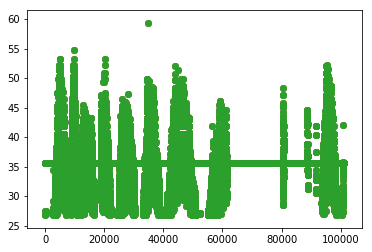

In [190]:
plt.scatter(id, heatindexm)
plt.show()

In [219]:
heatindexm[heatindexm < 27].aggregate('count')

90

In [216]:
heatindexm[heatindexm > 53].aggregate('count')

6

In [221]:
testset5 = testset4[testset4['heatindexm'] < 53]
testset5.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,vism,wdird,wgustm,windchillm,wspdm,year,month,day,hour,id
count,100949.000000,100949.000000,100949.000000,100949.000000,100949.000000,1.009490e+05,100949.000000,100949.000000,100949.000000,100949.000000,...,100949.000000,100949.000000,100949.000000,100949.000000,100949.000000,100949.000000,100949.000000,100949.000000,100949.000000,100949.000000
mean,15.739455,0.069708,0.000129,35.646763,57.905760,1.932817e+03,0.026241,0.000010,25.449101,0.009431,...,2.402660,163.563501,37.671175,5.713817,7.678513,2004.936701,6.579510,15.690121,10.929152,50507.173840
std,7.024046,0.254656,0.011347,2.677999,23.709741,3.180773e+05,0.159852,0.003147,8.454806,0.096652,...,20.290224,110.891143,0.705427,0.091051,11.793734,5.801700,3.476278,8.769990,6.854791,29149.748066
min,-7.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,25.900000,2.100000,0.000000,1996.000000,1.000000,1.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,35.651710,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,...,1.600000,70.000000,37.671175,5.713817,0.000000,2001.000000,4.000000,8.000000,5.000000,25267.000000
50%,15.000000,0.000000,0.000000,35.651710,58.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,...,2.000000,163.549974,37.671175,5.713817,7.400000,2003.000000,7.000000,16.000000,11.000000,50508.000000
75%,22.000000,0.000000,0.000000,35.651710,77.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,...,3.000000,270.000000,37.671175,5.713817,11.100000,2009.000000,10.000000,23.000000,17.000000,75752.000000
max,30.000000,1.000000,1.000000,52.300000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,...,6436.000000,960.000000,92.600000,7.300000,1514.900000,2017.000000,12.000000,31.000000,23.000000,100990.000000


detecting and removing outliers on the basis of hum column

In [222]:
hum = testset5['hum']
id = testset5['id']

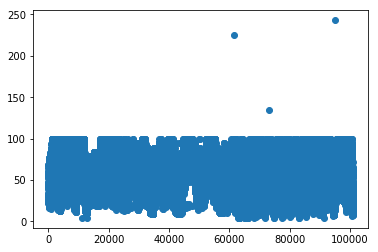

In [223]:
plt.scatter(id, hum)
plt.show()

In [225]:
hum[hum > 100].aggregate('count')

3

In [227]:
testset6 = testset5[testset5['hum'] < 100]
testset6.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,vism,wdird,wgustm,windchillm,wspdm,year,month,day,hour,id
count,97913.000000,97913.000000,97913.000000,97913.000000,97913.000000,9.791300e+04,97913.000000,97913.000000,97913.000000,97913.000000,...,97913.000000,97913.000000,97913.000000,97913.000000,97913.000000,97913.000000,97913.000000,97913.000000,97913.000000,97913.000000
mean,15.776128,0.052853,0.000133,35.650707,56.597444,1.966854e+03,0.023684,0.000010,25.786497,0.008742,...,2.431356,165.321814,37.671163,5.714012,7.769184,2005.029536,6.623400,15.684444,10.913730,51065.384586
std,6.991315,0.223741,0.011522,2.707100,22.853592,3.229709e+05,0.152064,0.003196,8.244147,0.093092,...,20.600957,110.403092,0.712524,0.071766,11.920166,5.777299,3.437107,8.755255,6.777999,28944.315320
min,-7.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,25.900000,2.100000,0.000000,1996.000000,1.000000,1.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,35.651710,38.000000,1.002000e+03,0.000000,0.000000,20.000000,0.000000,...,1.700000,70.000000,37.671175,5.713817,0.000000,2001.000000,4.000000,8.000000,5.000000,26260.000000
50%,15.000000,0.000000,0.000000,35.651710,57.909481,1.008000e+03,0.000000,0.000000,27.000000,0.000000,...,2.000000,163.549974,37.671175,5.713817,7.400000,2003.000000,7.000000,16.000000,11.000000,51069.000000
75%,22.000000,0.000000,0.000000,35.651710,76.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,...,3.000000,270.000000,37.671175,5.713817,11.100000,2009.000000,10.000000,23.000000,17.000000,76106.000000
max,30.000000,1.000000,1.000000,52.300000,99.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,...,6436.000000,960.000000,92.600000,7.300000,1514.900000,2017.000000,12.000000,31.000000,23.000000,100990.000000


detecting and removing outliers on the basis of remaining columns

In [228]:
pressurem = testset6['id']
id = testset6['id']
tempm = testset6['tempm']
vism = testset6['vism']
wdird = testset6['wdird']
wgustm = testset6['wgustm']
windchillm = testset6['windchillm']
wspdm = testset6['wspdm']

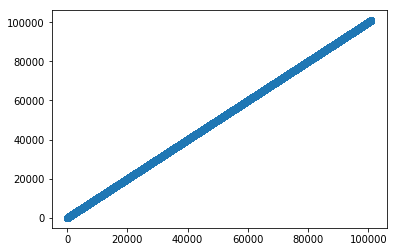

In [229]:
plt.scatter(id, pressurem) # no outlier
plt.show()

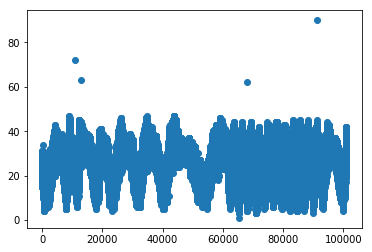

In [230]:
plt.scatter(id, tempm)
plt.show()

In [238]:
tempm[tempm > 60].aggregate('count')

4

In [239]:
testset7 = testset6[testset6['tempm'] < 60]
testset7.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,vism,wdird,wgustm,windchillm,wspdm,year,month,day,hour,id
count,97909.000000,97909.000000,97909.000000,97909.000000,97909.000000,9.790900e+04,97909.000000,97909.000000,97909.000000,97909.000000,...,97909.000000,97909.000000,97909.000000,97909.000000,97909.000000,97909.000000,97909.000000,97909.000000,97909.000000,97909.000000
mean,15.776293,0.052845,0.000133,35.650707,56.599593,1.966893e+03,0.023685,0.000010,25.784619,0.008743,...,2.431366,165.319340,37.671163,5.714012,7.769199,2005.029558,6.623324,15.683972,10.913961,51065.596564
std,6.991236,0.223725,0.011522,2.707155,22.851586,3.229775e+05,0.152067,0.003196,8.238766,0.093094,...,20.601375,110.404083,0.712538,0.071768,11.920327,5.777252,3.437101,8.755103,6.777998,28944.030262
min,-7.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,25.900000,2.100000,0.000000,1996.000000,1.000000,1.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,35.651710,38.000000,1.002000e+03,0.000000,0.000000,20.000000,0.000000,...,1.700000,70.000000,37.671175,5.713817,0.000000,2001.000000,4.000000,8.000000,5.000000,26261.000000
50%,15.000000,0.000000,0.000000,35.651710,57.909481,1.008000e+03,0.000000,0.000000,27.000000,0.000000,...,2.000000,163.549974,37.671175,5.713817,7.400000,2003.000000,7.000000,16.000000,11.000000,51069.000000
75%,22.000000,0.000000,0.000000,35.651710,76.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,...,3.000000,270.000000,37.671175,5.713817,11.100000,2009.000000,10.000000,23.000000,17.000000,76106.000000
max,30.000000,1.000000,1.000000,52.300000,99.000000,1.010614e+08,1.000000,1.000000,47.000000,1.000000,...,6436.000000,960.000000,92.600000,7.300000,1514.900000,2017.000000,12.000000,31.000000,23.000000,100990.000000


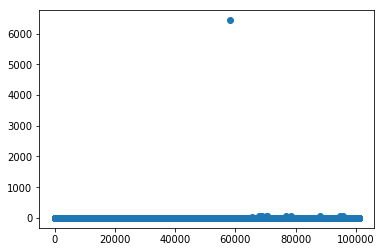

In [231]:
plt.scatter(id, vism)
plt.show()

In [240]:
vism[vism > 1000]

58253    6436.0
Name: vism, dtype: float64

In [243]:
t8 = testset7[testset7['vism'] < 1000]
t8.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,vism,wdird,wgustm,windchillm,wspdm,year,month,day,hour,id
count,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,9.790800e+04,97908.000000,97908.000000,97908.000000,97908.000000,...,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000,97908.000000
mean,15.776280,0.052846,0.000133,35.650789,56.599620,1.966903e+03,0.023686,0.000010,25.784606,0.008743,...,2.365656,165.320007,37.671163,5.714012,7.769203,2005.029569,6.623350,15.683866,10.913868,51065.523144
std,6.991271,0.223726,0.011522,2.707050,22.851701,3.229791e+05,0.152068,0.003196,8.238807,0.093094,...,1.288541,110.404449,0.712542,0.071768,11.920388,5.777281,3.437108,8.755086,6.777971,28944.168958
min,-7.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,25.900000,2.100000,0.000000,1996.000000,1.000000,1.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,35.651710,38.000000,1.002000e+03,0.000000,0.000000,20.000000,0.000000,...,1.700000,70.000000,37.671175,5.713817,0.000000,2001.000000,4.000000,8.000000,5.000000,26260.750000
50%,15.000000,0.000000,0.000000,35.651710,57.909481,1.008000e+03,0.000000,0.000000,27.000000,0.000000,...,2.000000,163.549974,37.671175,5.713817,7.400000,2003.000000,7.000000,16.000000,11.000000,51068.500000
75%,22.000000,0.000000,0.000000,35.651710,76.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,...,3.000000,270.000000,37.671175,5.713817,11.100000,2009.000000,10.000000,23.000000,17.000000,76106.250000
max,30.000000,1.000000,1.000000,52.300000,99.000000,1.010614e+08,1.000000,1.000000,47.000000,1.000000,...,60.000000,960.000000,92.600000,7.300000,1514.900000,2017.000000,12.000000,31.000000,23.000000,100990.000000


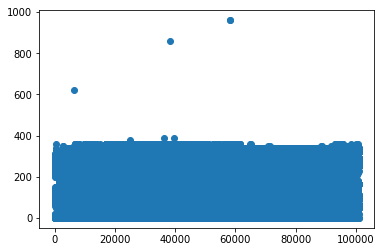

In [232]:
plt.scatter(id, wdird)
plt.show()

In [244]:
wdird[wdird > 600]

6385     620.0
38253    860.0
58161    960.0
58372    959.0
Name: wdird, dtype: float64

In [245]:
t9 = t8[t8['wdird'] < 600]
t9.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,vism,wdird,wgustm,windchillm,wspdm,year,month,day,hour,id
count,97904.000000,97904.000000,97904.000000,97904.000000,97904.000000,9.790400e+04,97904.000000,97904.000000,97904.000000,97904.000000,...,97904.000000,97904.000000,97904.000000,97904.000000,97904.000000,97904.000000,97904.000000,97904.000000,97904.000000,97904.000000
mean,15.776169,0.052848,0.000133,35.650845,56.599501,1.966942e+03,0.023686,0.000010,25.784506,0.008743,...,2.365643,165.292044,37.671163,5.714012,7.769028,2005.029703,6.623345,15.683547,10.913691,51065.963239
std,6.991356,0.223730,0.011522,2.707047,22.851797,3.229857e+05,0.152071,0.003196,8.238908,0.093096,...,1.288558,110.316428,0.712556,0.071770,11.920417,5.777332,3.437133,8.755093,6.778031,28944.360735
min,-7.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,25.900000,2.100000,0.000000,1996.000000,1.000000,1.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,35.651710,38.000000,1.002000e+03,0.000000,0.000000,20.000000,0.000000,...,1.700000,70.000000,37.671175,5.713817,0.000000,2001.000000,4.000000,8.000000,5.000000,26260.750000
50%,15.000000,0.000000,0.000000,35.651710,57.909481,1.008000e+03,0.000000,0.000000,27.000000,0.000000,...,2.000000,163.549974,37.671175,5.713817,7.400000,2003.000000,7.000000,16.000000,11.000000,51068.500000
75%,22.000000,0.000000,0.000000,35.651710,76.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,...,3.000000,270.000000,37.671175,5.713817,11.100000,2009.000000,10.000000,23.000000,17.000000,76107.250000
max,30.000000,1.000000,1.000000,52.300000,99.000000,1.010614e+08,1.000000,1.000000,47.000000,1.000000,...,60.000000,390.000000,92.600000,7.300000,1514.900000,2017.000000,12.000000,31.000000,23.000000,100990.000000


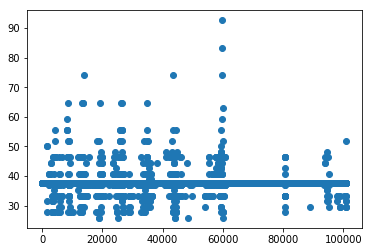

In [246]:
plt.scatter(id, wgustm) # no outliers
plt.show()

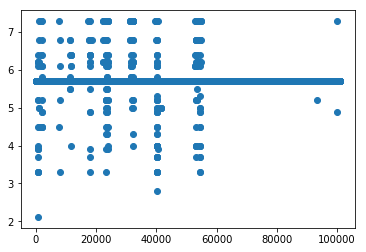

In [247]:
plt.scatter(id, windchillm) # no outliers
plt.show()

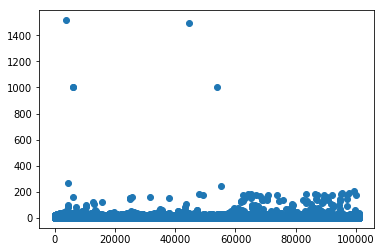

In [235]:
plt.scatter(id, wspdm)
plt.show()

In [249]:
wspdm[wspdm > 400].aggregate('count')

5

In [251]:
t10 = t9[t9['wspdm'] < 400]
t10.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,...,vism,wdird,wgustm,windchillm,wspdm,year,month,day,hour,id
count,97899.000000,97899.000000,97899.000000,97899.000000,97899.000000,9.789900e+04,97899.000000,97899.000000,97899.000000,97899.000000,...,97899.000000,97899.000000,97899.000000,97899.000000,97899.000000,97899.000000,97899.000000,97899.000000,97899.000000,97899.000000
mean,15.776035,0.052850,0.000133,35.650803,56.599358,1.967216e+03,0.023688,0.000010,25.784301,0.008744,...,2.365545,165.292999,37.671163,5.714012,7.708062,2005.029980,6.623377,15.683705,10.913758,51067.402323
std,6.991256,0.223736,0.011523,2.707100,22.851662,3.229940e+05,0.152075,0.003196,8.238934,0.093099,...,1.288448,110.317443,0.712574,0.071772,8.136973,5.777304,3.437152,8.755172,6.778052,28943.983754
min,-7.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,25.900000,2.100000,0.000000,1996.000000,1.000000,1.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,35.651710,38.000000,1.002000e+03,0.000000,0.000000,20.000000,0.000000,...,1.700000,70.000000,37.671175,5.713817,0.000000,2001.000000,4.000000,8.000000,5.000000,26262.500000
50%,15.000000,0.000000,0.000000,35.651710,57.909481,1.008000e+03,0.000000,0.000000,27.000000,0.000000,...,2.000000,163.549974,37.671175,5.713817,7.400000,2003.000000,7.000000,16.000000,11.000000,51070.000000
75%,22.000000,0.000000,0.000000,35.651710,76.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,...,3.000000,270.000000,37.671175,5.713817,11.100000,2009.000000,10.000000,23.000000,17.000000,76108.500000
max,30.000000,1.000000,1.000000,52.300000,99.000000,1.010614e+08,1.000000,1.000000,47.000000,1.000000,...,60.000000,390.000000,92.600000,7.300000,268.500000,2017.000000,12.000000,31.000000,23.000000,100990.000000


PLOTS OF NUMERIC FEATURES

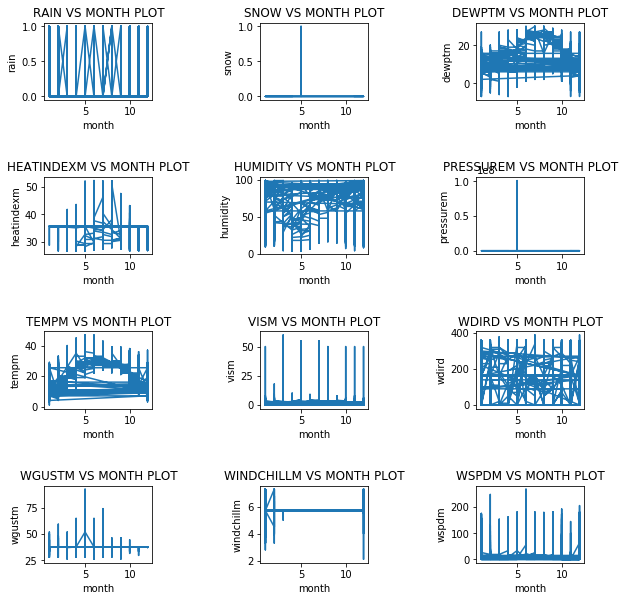

In [274]:
fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.5, bottom=0.5, right=1, top=2, wspace=1, hspace=1)

ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax11 = fig.add_subplot(4,3,11)
ax12 = fig.add_subplot(4,3,12)


ax1.plot(t10['month'],t10['rain'])
ax1.set_title("RAIN VS MONTH PLOT")
ax1.set_xlabel("month")
ax1.set_ylabel("rain")

ax2.plot(t10['month'], t10['snow'])
ax2.set_title("SNOW VS MONTH PLOT")
ax2.set_xlabel("month")
ax2.set_ylabel("snow")

ax3.plot(t10['month'], t10['dewptm'])
ax3.set_title("DEWPTM VS MONTH PLOT")
ax3.set_xlabel("month")
ax3.set_ylabel("dewptm")

ax4.plot(t10['month'], t10['heatindexm'])
ax4.set_title("HEATINDEXM VS MONTH PLOT")
ax4.set_xlabel("month")
ax4.set_ylabel("heatindexm")

ax5.plot(t10['month'], t10['hum'])
ax5.set_title("HUMIDITY VS MONTH PLOT")
ax5.set_xlabel("month")
ax5.set_ylabel("humidity")

ax6.plot(t10['month'], t10['pressurem'])
ax6.set_title("PRESSUREM VS MONTH PLOT")
ax6.set_xlabel("month")
ax6.set_ylabel("pressurem")

ax7.plot(t10['month'], t10['tempm'])
ax7.set_title("TEMPM VS MONTH PLOT")
ax7.set_xlabel("month")
ax7.set_ylabel("tempm")

ax8.plot(t10['month'], t10['vism'])
ax8.set_title("VISM VS MONTH PLOT")
ax8.set_xlabel("month")
ax8.set_ylabel("vism")

ax9.plot(t10['month'], t10['wdird'])
ax9.set_title("WDIRD VS MONTH PLOT")
ax9.set_xlabel("month")
ax9.set_ylabel("wdird")

ax10.plot(t10['month'], t10['wgustm'])
ax10.set_title("WGUSTM VS MONTH PLOT")
ax10.set_xlabel("month")
ax10.set_ylabel("wgustm")

ax11.plot(t10['month'], t10['windchillm'])
ax11.set_title("WINDCHILLM VS MONTH PLOT")
ax11.set_xlabel("month")
ax11.set_ylabel("windchillm")

ax12.plot(t10['month'], t10['wspdm'])
ax12.set_title("WSPDM VS MONTH PLOT")
ax12.set_xlabel("month")
ax12.set_ylabel("wspdm")

plt.show()

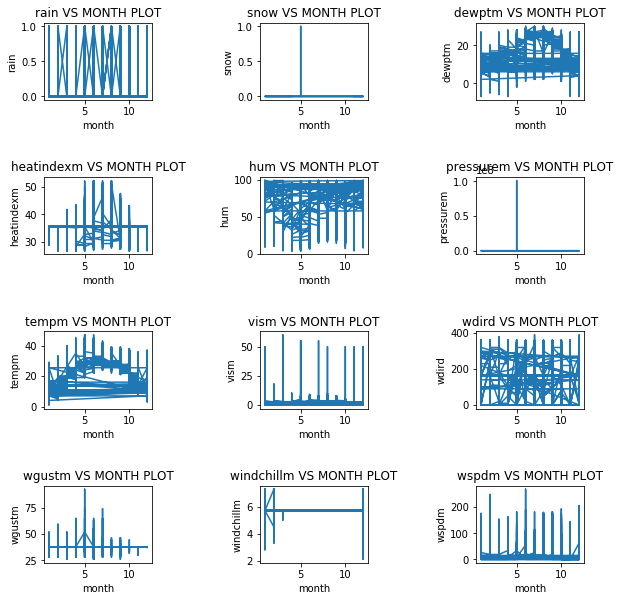

In [349]:
fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.5, bottom=0.5, right=1, top=2, wspace=1, hspace=1)
columns_considered = ['rain','snow','dewptm','heatindexm','hum','pressurem','tempm','vism','wdird','wgustm','windchillm','wspdm']
for x in np.arange(1,13,1):
    ax = fig.add_subplot(4,3,x)
    r = columns_considered[x-1]
    
    ax.plot(t10['month'],t10[r])
    ax.set_title("{} VS MONTH PLOT".format(r))
    ax.set_xlabel("month")
    ax.set_ylabel("{}".format(r))
plt.show()
    

PIE CHARTS FOR WEATHER CONDITIONS IN A MONTH

In [275]:
data = pd.read_csv('testset.csv')

In [279]:
data['Date'] = pd.to_datetime(data['datetime_utc'])
data['month'] = data['Date'].dt.month

In [278]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm,Date,month
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,0,0,5.0,280.0,West,NaN,NaN,7.4,1996-11-01 11:00:00,11
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996-11-01 12:00:00,11
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996-11-01 13:00:00,11
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0,0,2.0,0.0,North,NaN,NaN,NaN,1996-11-01 14:00:00,11
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0,0,1.2,0.0,North,NaN,NaN,0.0,1996-11-01 16:00:00,11


In [287]:
month_list = data['month']
conditions_list = data[' _conds']

In [292]:
data2 = pd.concat((month_list, conditions_list), axis=1, keys=['month','condition'])

In [312]:
data2.head()

,month,condition
0,11,Smoke
1,11,Smoke
2,11,Smoke
3,11,Smoke
4,11,Smoke


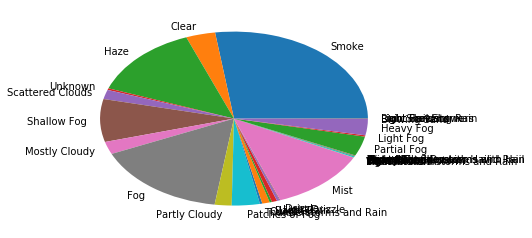

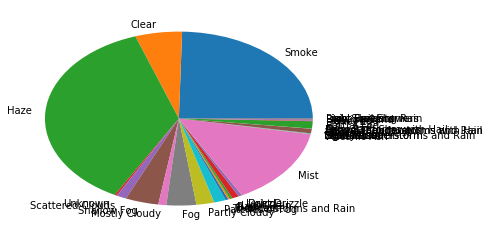

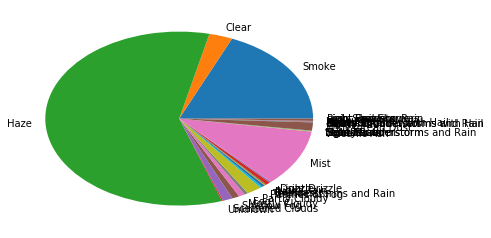

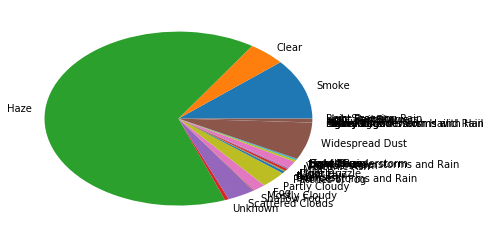

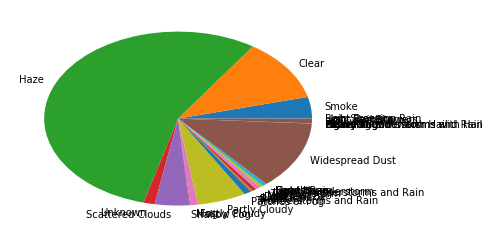

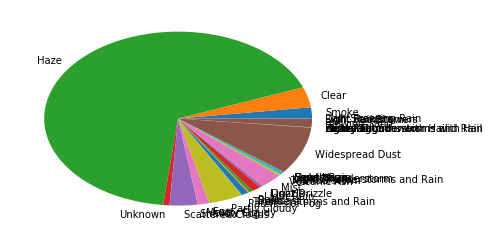

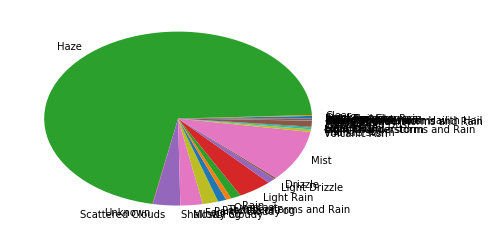

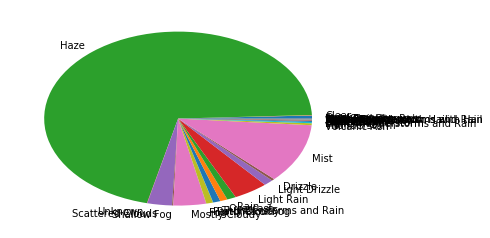

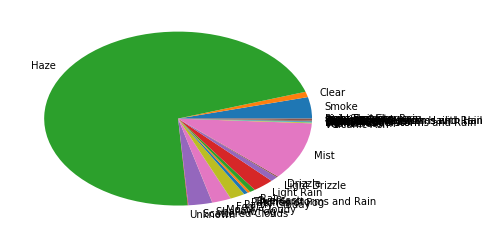

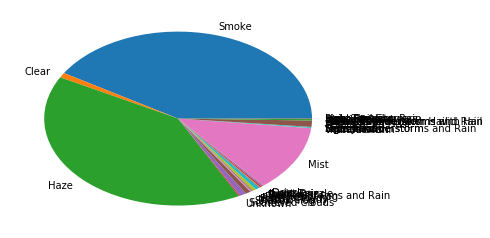

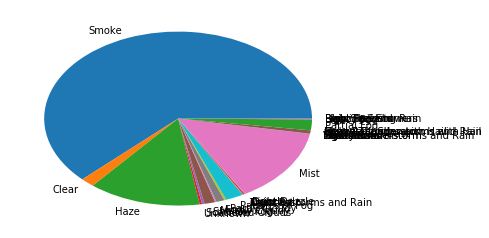

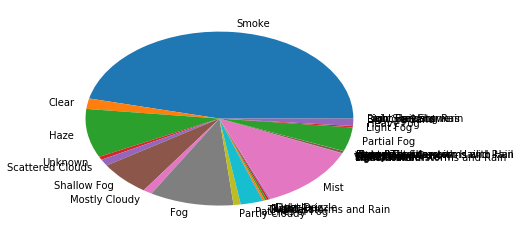

In [344]:
h = np.arange(1,13,1)
labels_pie = data2['condition'].unique()
for month_num in h:
    values_pie = []
    for x in labels_pie:
        c = data2[(data2['condition'] == x) & (data2['month'] == month_num)].aggregate('count')['month']
        values_pie.append(c)
    plt.pie(values_pie, labels = labels_pie)
    plt.show()